In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/home/noah/Desktop/large_analysis/ca_analysis')
import fileread as fr
from scipy.optimize import curve_fit
from scipy.signal import fftconvolve
import predefined as pd
import wave_ops as wo
import os
from scipy.optimize import curve_fit


def gauss(x,*pars):
    a,mu,sigma=pars
    return a*np.exp(-1.*(x.astype('float')-mu)**2./(2.*sigma**2.))

[1.51597268e+04 9.97451043e+02 1.31695499e+01]
[11519.36608807   994.81494614    17.30640354]


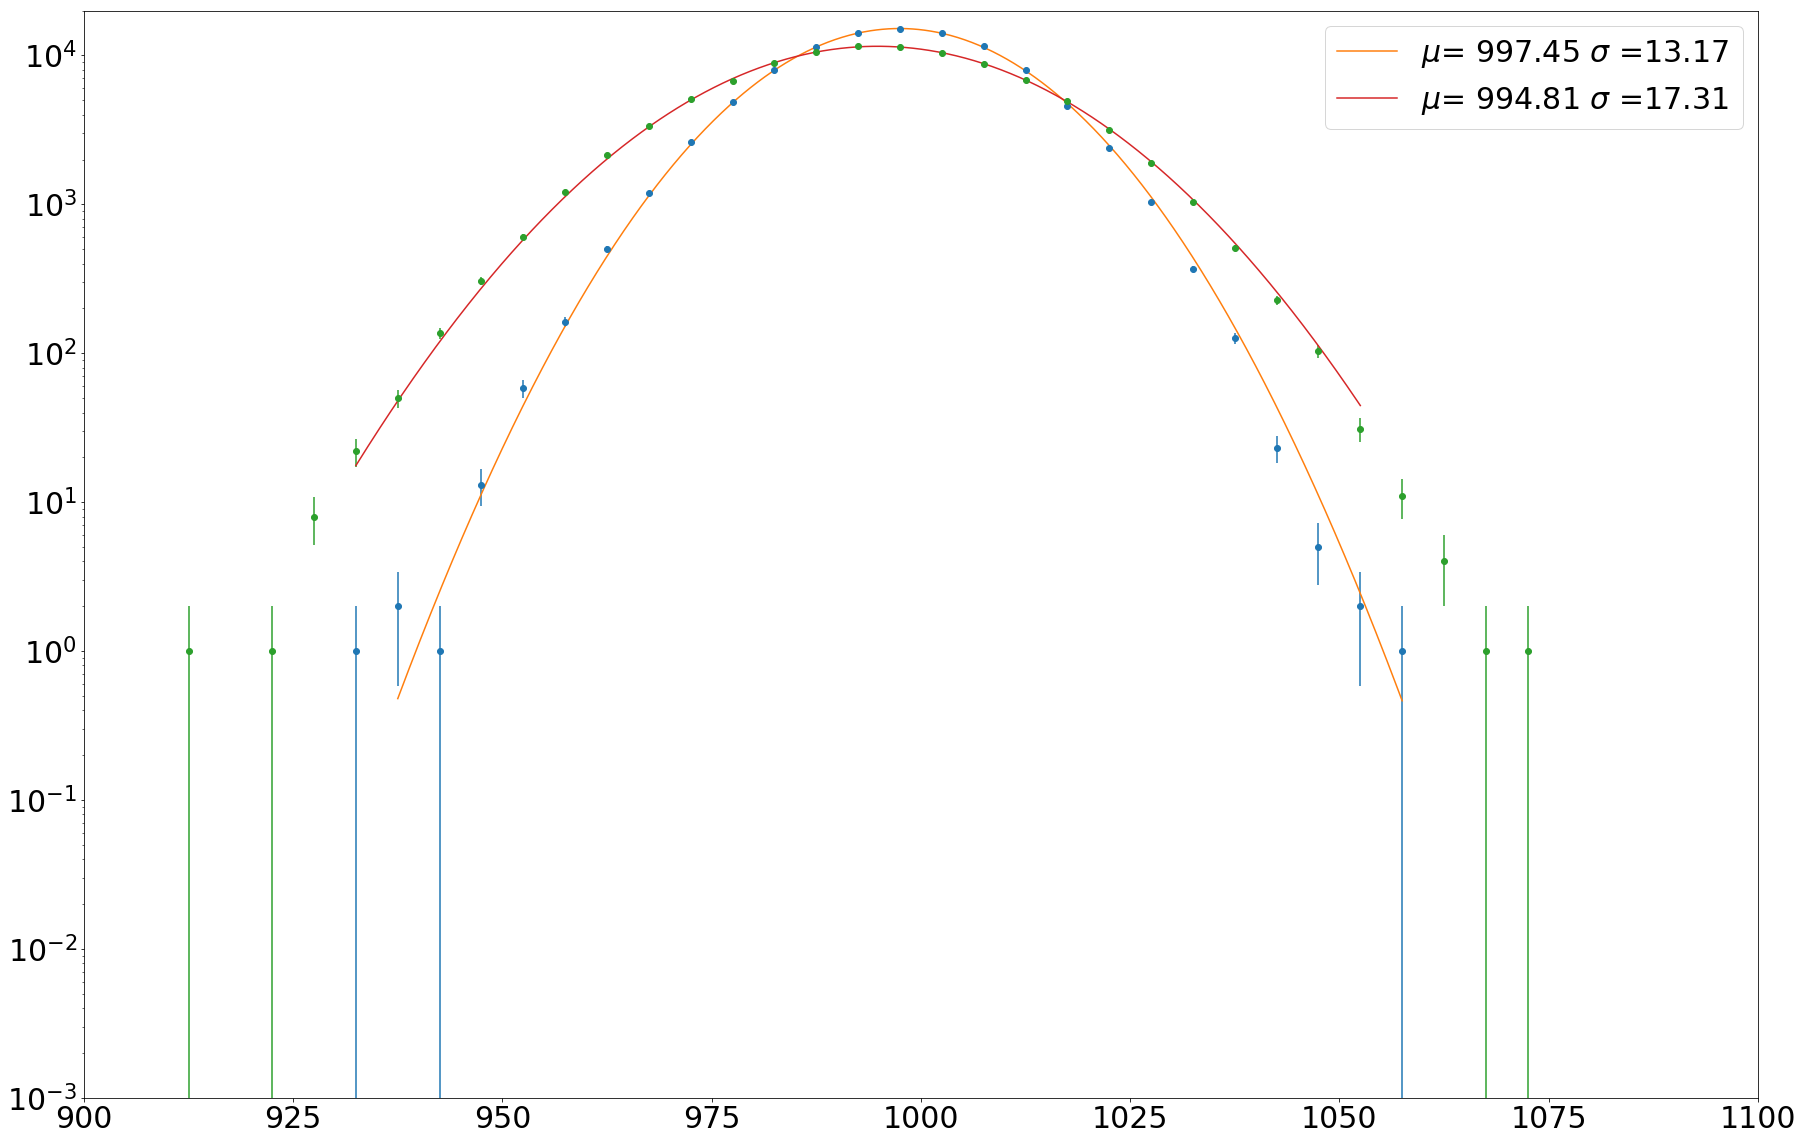

In [10]:
fs=30
d=[]
legend=[]
hists=[]
d.append(fr.gen_output('Run_0_0-std.bin')[0])
legend.append('No Oscillation Removal')
d.append(fr.gen_output('Run_0_0-no_osc.bin')[0])
legend.append('Oscillations Removed')

plt.figure(figsize=(30,20))
plt.tick_params(labelsize=fs)
for i in range(len(d)):
    hist,bins=np.histogram(d[i]['energy'],bins=1000,range=[0,5000])
    bins=pd.cbins(bins)
    plt.errorbar(bins,hist,np.sqrt(hist),fmt='o')
    mx=np.amax(hist)
    loc=int(np.argmax(hist))
    beg,end=bins[loc]-60,bins[loc]+60
    t=np.linspace(beg,end,1000)
    fithist=hist[pd.land(bins>beg,bins<end)]
    fitbins=bins[pd.land(bins>beg,bins<end)]
    pars=[mx,bins[loc],10]
    pars=curve_fit(gauss,xdata=fitbins,ydata=fithist,p0=pars,method='lm')[0]
    plt.plot(t,gauss(t,*pars),label=r'$\mu$= {0:0.2f} $\sigma$ ={1:0.2f} '.format(pars[1],pars[2]))
    print( pars)
plt.xlim(900,1100)
plt.ylim(1E-3,2e4)
plt.yscale('log')
plt.legend(fontsize=fs)
plt.show()